Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-13 07:30:40--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-13 07:30:40--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc401b0d2bed1ff1f021e0d742e4.dl.dropboxusercontent.com/cd/0/inline/Bdv5hvLfenMSymkCoZy9-wX76WmzbbXAGQlkvkyQCYH2nDOyYJ55j8xiNnP1brrO7Ox0QCIw1aUxdAXzOO6SvWrHHR-QHKFJ46uzsQn9izLTTWZfdwLEAQMTR8fAc41VU3i0boIW68GEwU0wQ18CSgCl/file# [following]
--2022-01-13 07:30:40--  https://uc401b0d2bed1ff1f021e0d742e4.dl.dropboxusercontent.com/cd/0/inline/Bdv5hvLfenMSymkCoZy9-wX76WmzbbXAGQlkvkyQCYH2nDOyYJ55j8xiNnP1brrO7O

In [2]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [3]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [4]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [5]:
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]

In [6]:
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [7]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

In [8]:
#split dataframe into 3 years
df15 = dften[dften['date'].dt.year == 2015]
df16 = dften[dften['date'].dt.year == 2016]
df17 = dften[dften['date'].dt.year == 2017]

In [9]:
def cytogenesis(df, nc, mapedges):
  #def calculate_cellsize(nc, mapedges):
  def calculate_cellsize():
    global lonmin
    global lonmax
    global latmin
    global latmax
    lonmin = mapedges[0]
    lonmax = mapedges[1]
    latmin = mapedges[2]
    latmax = mapedges[3]
    global csize_lon
    global csize_lat
    csize_lon = (lonmax - lonmin)/nc
    csize_lat = (latmax - latmin)/nc
    #print(csize_lon)
    #print(csize_lat)
    return csize_lon, csize_lat, lonmin, lonmax, latmin, latmax

  #call the 1st subfunction
  #csize_lon, csize_lat = calculate_cellsize(nc, mapedges)
  csize_lon, csize_lat, lonmin, lonmax, latmin, latmax = calculate_cellsize()
  
  #def draw_lines(nc,csize_lon,csize_lat):
  def draw_lines():
    global pixgrade_lon_left
    global pixgrade_lon_right
    global pixgrade_lat_bottom
    global pixgrade_lat_top

    pixgrade_lon_left = np.zeros(nc, dtype="float64")
    pixgrade_lon_right = np.zeros(nc, dtype="float64")
    pixgrade_lat_bottom = np.zeros(nc, dtype="float64")
    pixgrade_lat_top = np.zeros(nc, dtype="float64")
    #draw block boundaries
    for i in range (0,nc,1):

      pixgrade_lon_left[i] = lonmin + ((i)*(csize_lon))
      pixgrade_lon_right[i] = lonmin + ((i+1)*(csize_lon))
      pixgrade_lat_bottom[i] = latmin + ((i)*(csize_lat))
      pixgrade_lat_top[i] = latmin + ((i+1)*(csize_lat))
    
    #print(pixgrade_lon_left)
    #print(pixgrade_lon_right)
    #print(pixgrade_lat_bottom)
    #print(pixgrade_lat_top)
    return pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top

  #pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines(nc,csize_lon,csize_lat)
  pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines()

  #def cell_loader(df, nc, csize_lon, csize_lat, pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top):
  def cell_loader():  
    #create a board
    block = np.zeros((nc, nc), dtype="float32")
    point = np.zeros([len(df),2])

    for i in range (0,len(df),1):
      point[i,0] = df.longitude[i]
      point[i,1] = df.latitude[i]
      #the inner nested loop considers where to place each point into a cell
      for j in range (0,nc,1):
        for k in range (0,nc,1):
          if ((point[i,0] >= pixgrade_lon_left[j]) & (point[i,0] < pixgrade_lon_right[j]) & (point[i,1] >= pixgrade_lat_bottom[k]) & (point[i,1] < pixgrade_lat_top[k])):
            block[j,k] += 1
    #orgaise the cell tablet for proper visualisation
    global bq
    bq = np.rot90(block, k=1)
    bq = bq.astype(np.uint8)

    def heatmap2d(arr: np.ndarray):
      plt.imshow(arr, cmap='viridis')
      plt.colorbar()
      plt.show()

    heatmap2d(bq)
    return bq

  bq = cell_loader()
  return bq

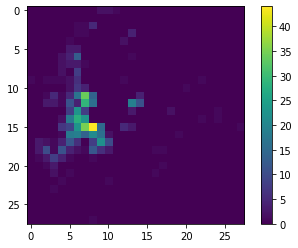

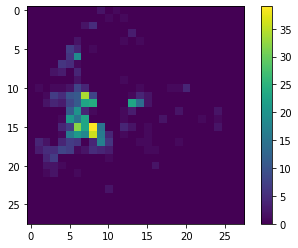

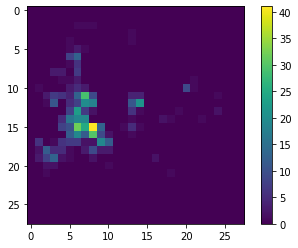

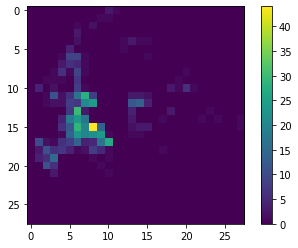

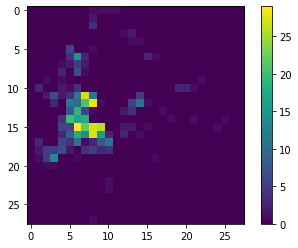

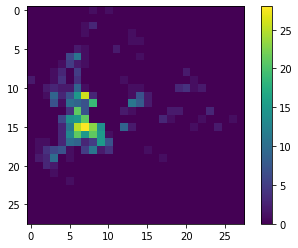

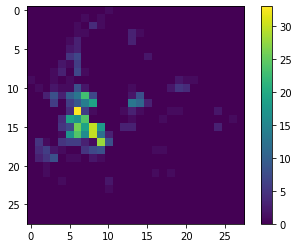

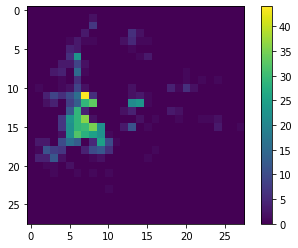

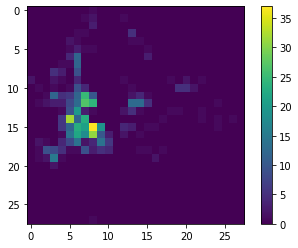

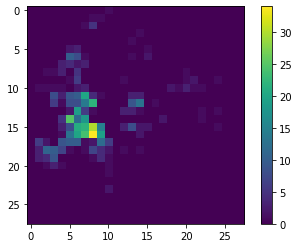

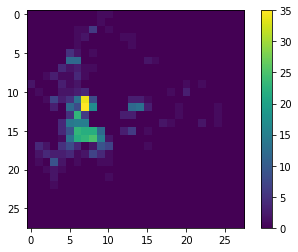

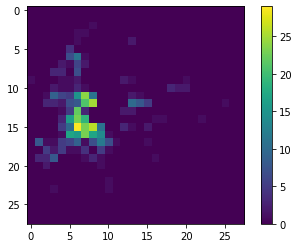

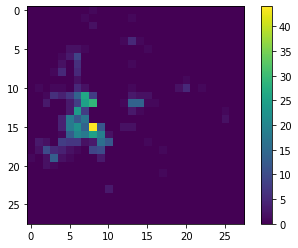

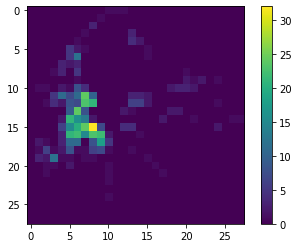

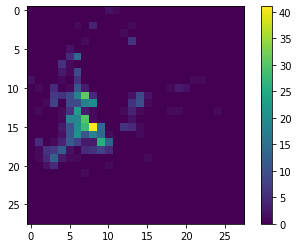

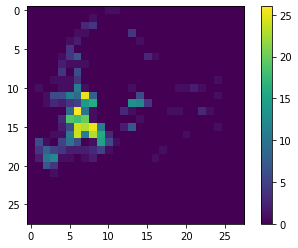

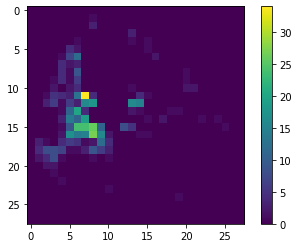

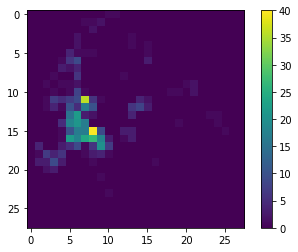

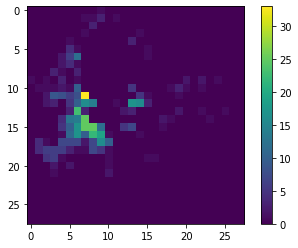

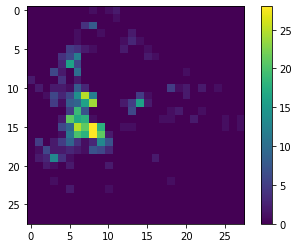

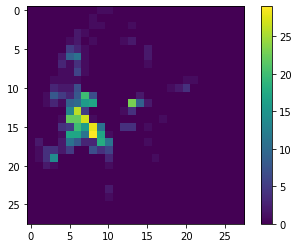

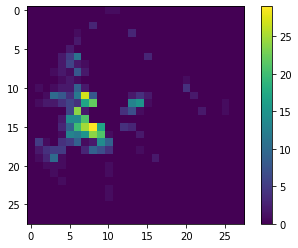

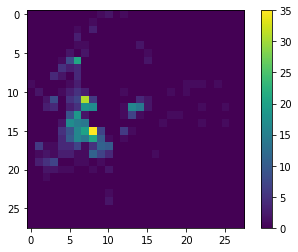

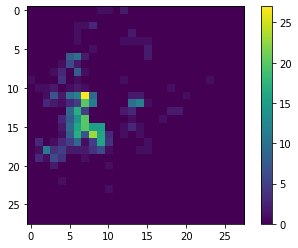

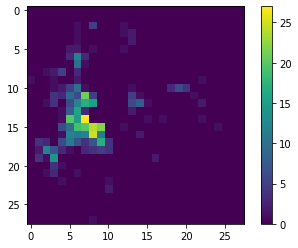

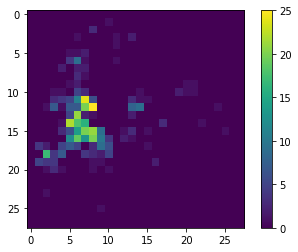

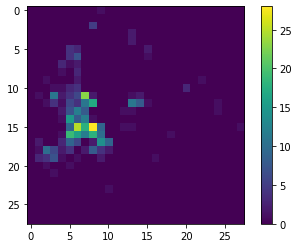

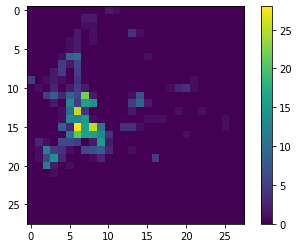

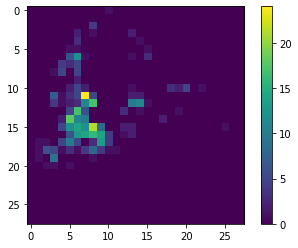

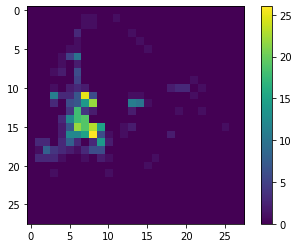

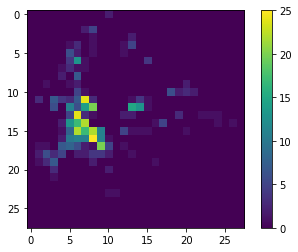

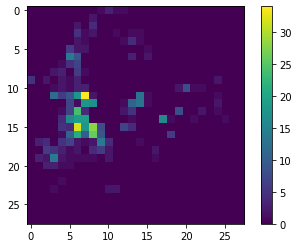

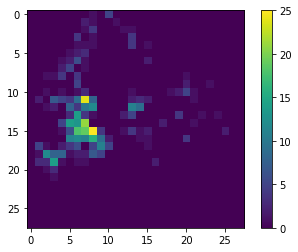

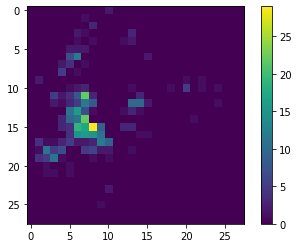

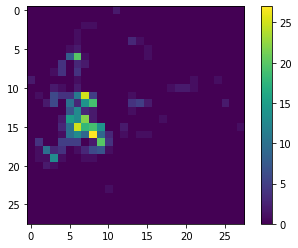

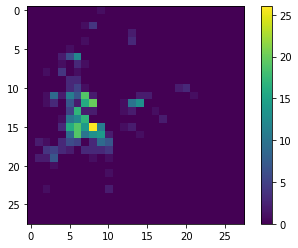

In [10]:
def dozenisation(dff, BBox=BBox):

  figtensor = np.zeros([12,28,28])
  for i in range(0,12,1):
    timeframe = (dff['date'].dt.month == i+1)
    df00 = dff.loc[timeframe]
    df00 = df00.reset_index(drop=True)
    df00.head()
    fig0 = cytogenesis(df00, 28, BBox)
    figtensor[i] = fig0
  return figtensor

figtensor15 = dozenisation(df15)
figtensor16 = dozenisation(df16)
figtensor17 = dozenisation(df17)
figtensor = np.concatenate((figtensor15, figtensor16, figtensor17), axis=0)

In [11]:
print(figtensor.shape)
maxcolour = figtensor.max()
print(maxcolour)

(36, 28, 28)
44.0


In [12]:
def ttsplit(dataarray):
  trainarr = np.zeros([24,28,28], dtype='uint8')
  testarr = np.zeros([12,28,28], dtype='uint8')
  j = 0
  k = 0
  for i in range (0, len(dataarray), 1):
    if (i % 3 == 2):
      testarr[j,:,:] = dataarray[i,:,:]
      j+=1
    else:
      trainarr[k,:,:] = dataarray[i,:,:]
      k+=1
  return trainarr, testarr

traindata, testdata = ttsplit(figtensor)

def relative_normalisation(nparray):
  maxcolour = figtensor.max()
  coeff = (255 / maxcolour)
  nparray = nparray.astype('float32')
  new_arr = nparray * coeff
  return new_arr

traindata = relative_normalisation(traindata)
testdata = relative_normalisation(testdata)
print(traindata.shape)
print(testdata.shape)

(24, 28, 28)
(12, 28, 28)


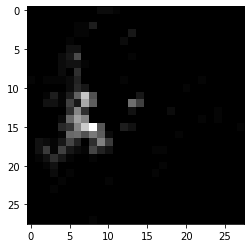

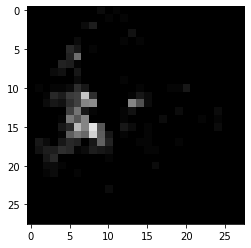

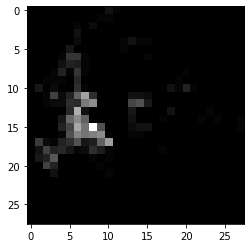

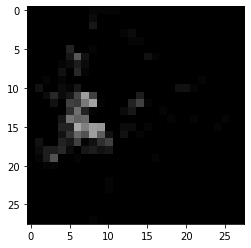

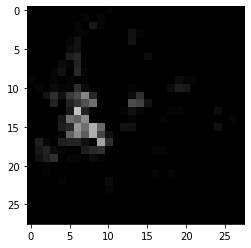

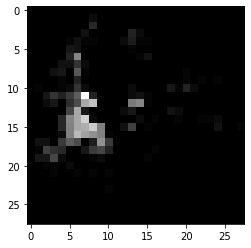

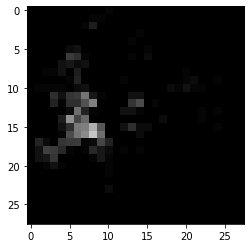

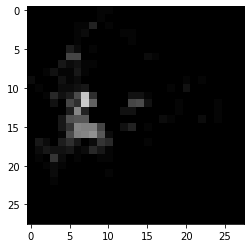

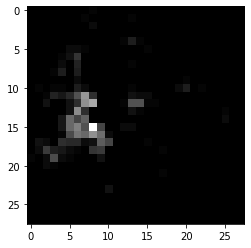

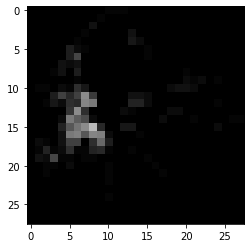

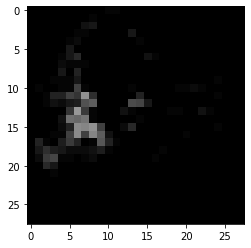

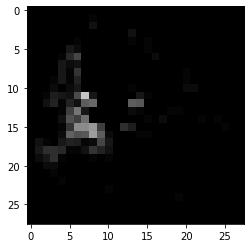

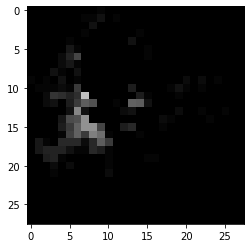

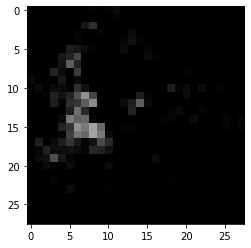

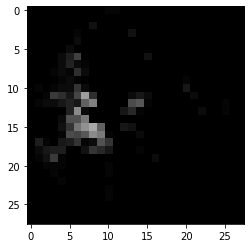

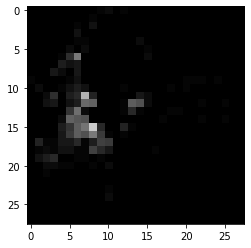

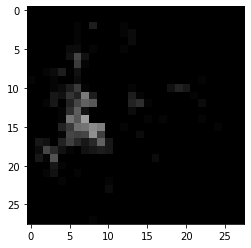

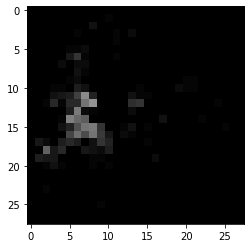

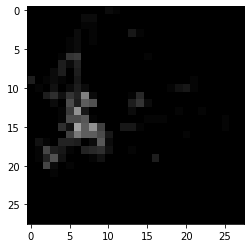

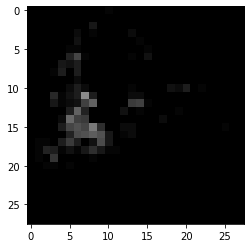

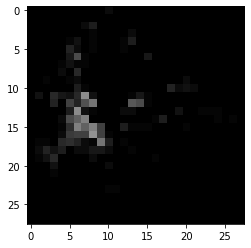

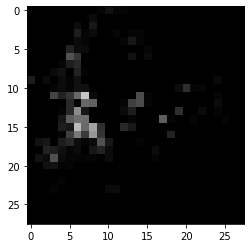

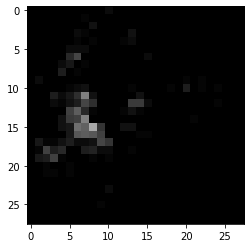

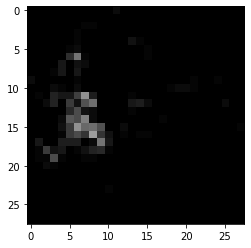

In [13]:
for i in range(0, len(traindata),1):
  plt.imshow(traindata[i], cmap='gray', vmin=0, vmax=255)
  plt.show()

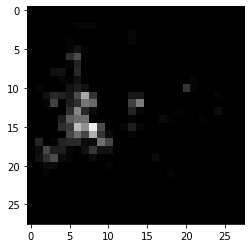

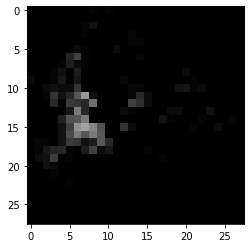

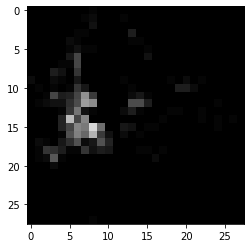

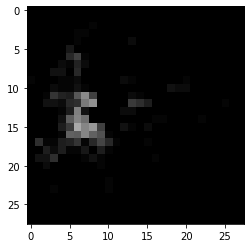

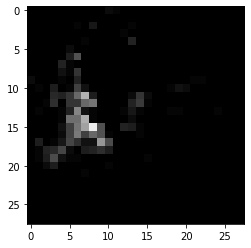

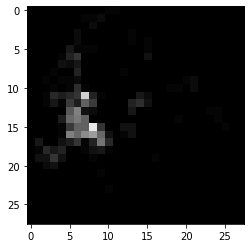

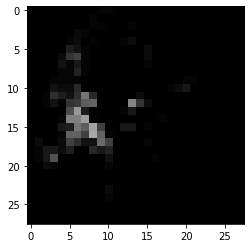

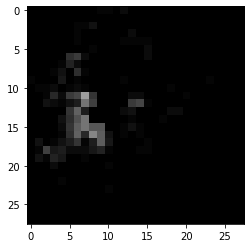

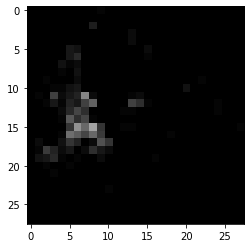

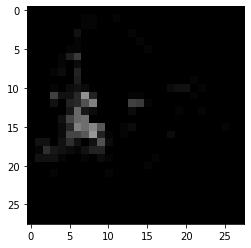

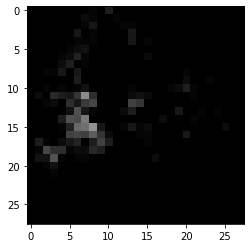

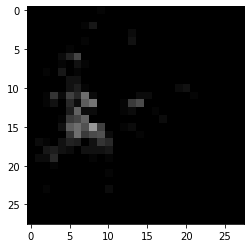

In [14]:
for i in range(0, len(testdata),1):
  plt.imshow(testdata[i], cmap='gray', vmin=0, vmax=255)
  plt.show()

#The WGAN Model

In [15]:
### install necessary packages if in colab
def run_subprocess_command(cmd):
  process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
  for line in process.stdout:
      print(line.decode().strip())
      
import sys, subprocess
IN_COLAB = 'google.colab' in sys.modules
colab_requirements = ['pip install tf-nightly-gpu-2.0-preview==2.0.0.dev20190513']
if IN_COLAB:
  for i in colab_requirements:
    run_subprocess_command(i)

In [16]:
# make visible the only one GPU
%env CUDA_VISIBLE_DEVICES=3

env: CUDA_VISIBLE_DEVICES=3


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [18]:
print(tf.__version__)

2.7.0


In [19]:
TRAIN_BUF=24
BATCH_SIZE=12
TEST_BUF=12
DIMS = (28,28,1)
N_TRAIN_BATCHES =int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)

In [20]:
# load dataset
train_images = traindata
test_images = testdata

# split the dataset, and normalise it to sigmoid [0,1]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype(
    "float32"
) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

# batch datasets
train_dataset = (
    tf.data.Dataset.from_tensor_slices(train_images)
    .shuffle(TRAIN_BUF)
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset.from_tensor_slices(test_images)
    .shuffle(TEST_BUF)
    .batch(BATCH_SIZE)
)

### Define the network as tf.keras.model object

In [21]:
class WGAN(tf.keras.Model):
    """[summary]
    I used github/LynnHo/DCGAN-LSGAN-WGAN-GP-DRAGAN-Tensorflow-2/ as a reference on this.
    
    Extends:
        tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(WGAN, self).__init__()
        self.__dict__.update(kwargs)

        self.gen = tf.keras.Sequential(self.gen)
        self.disc = tf.keras.Sequential(self.disc)

    def generate(self, z):
        return self.gen(z)

    def discriminate(self, x):
        return self.disc(x)

    def compute_loss(self, x):
        """ passes through the network and computes loss
        """
        ### pass through network
        # generating noise from a uniform distribution

        z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])

        # run noise through generator
        x_gen = self.generate(z_samp)
        # discriminate x and x_gen
        logits_x = self.discriminate(x)
        logits_x_gen = self.discriminate(x_gen)

        # gradient penalty
        d_regularizer = self.gradient_penalty(x, x_gen)
        ### losses
        disc_loss = (
            tf.reduce_mean(logits_x)
            - tf.reduce_mean(logits_x_gen)
            + d_regularizer * self.gradient_penalty_weight
        )

        # losses of fake with label "1"
        gen_loss = tf.reduce_mean(logits_x_gen)

        return disc_loss, gen_loss

    def compute_gradients(self, x):
        """ passes through the network and computes loss
        """
        ### pass through network
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            disc_loss, gen_loss = self.compute_loss(x)

        # compute gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)

        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        return gen_gradients, disc_gradients

    def apply_gradients(self, gen_gradients, disc_gradients):

        self.gen_optimizer.apply_gradients(
            zip(gen_gradients, self.gen.trainable_variables)
        )
        self.disc_optimizer.apply_gradients(
            zip(disc_gradients, self.disc.trainable_variables)
        )

    def gradient_penalty(self, x, x_gen):
        epsilon = tf.random.uniform([x.shape[0], 1, 1, 1], 0.0, 1.0)
        x_hat = epsilon * x + (1 - epsilon) * x_gen
        with tf.GradientTape() as t:
            t.watch(x_hat)
            d_hat = self.discriminate(x_hat)
        gradients = t.gradient(d_hat, x_hat)
        ddx = tf.sqrt(tf.reduce_sum(gradients ** 2, axis=[1, 2]))
        d_regularizer = tf.reduce_mean((ddx - 1.0) ** 2)
        return d_regularizer

    @tf.function
    def train(self, train_x):
        gen_gradients, disc_gradients = self.compute_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)

### Define the network architecture

In [22]:
N_Z = 64

generator = [
    tf.keras.layers.Dense(units=7 * 7 * 64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"
    ),
]

discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
]

### Create Model

In [23]:
# optimizers
gen_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.RMSprop(0.001)# train the model
# model
model = WGAN(
    gen = generator,
    disc = discriminator,
    gen_optimizer = gen_optimizer,
    disc_optimizer = disc_optimizer,
    n_Z = N_Z,
    gradient_penalty_weight = 10.0
)

### Train the model

In [24]:
# exampled data for plotting results
def plot_reconstruction(model, nex=8, zm=2):
    samples = model.generate(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    fig, axs = plt.subplots(ncols=nex, nrows=1, figsize=(zm * nex, zm))
    for axi in range(nex):
        axs[axi].matshow(
                    samples.numpy()[axi].squeeze(), cmap=plt.cm.Greys, vmin=0, vmax=1
                )
        axs[axi].axis('off')
    plt.show()

In [25]:
# a pandas dataframe to save the loss information to
losses = pd.DataFrame(columns = ['disc_loss', 'gen_loss'])

Epoch: 99 | disc_loss: -0.19166961312294006 | gen_loss: 0.6323153376579285


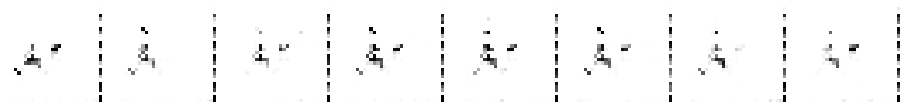

In [26]:
n_epochs = 100
for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES
    ):
        model.train(train_x)
    # test on holdout
    loss = []
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES
    ):
        loss.append(model.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print(
        "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
            epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1]
        )
    )
    plot_reconstruction(model)

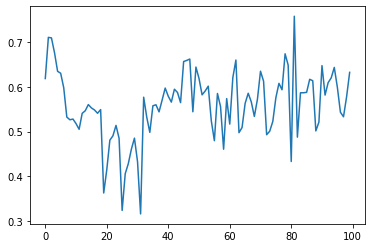

In [27]:
plt.plot(losses.gen_loss.values)

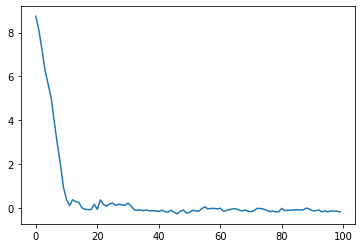

In [28]:
plt.plot(losses.disc_loss.values)

Calculate Test Metrics

In [29]:
def reverse_sigmoid(nparray, maxcolour=figtensor.max()):
  nparray = nparray.astype('float32')
  maxcolour = float(maxcolour)
  new_arr = nparray * maxcolour
  return new_arr

In [30]:
gt = test_images.squeeze()
gt = gt.reshape(12,784)
gt = reverse_sigmoid(gt)
gt.shape

(12, 784)

In [31]:
#prediction
ypred = model.generate(tf.random.normal(shape=(12, 64)))
ypred = tf.squeeze(ypred)
ypred = ypred.numpy()
ypred = ypred.reshape(12,784)
ypred = reverse_sigmoid(ypred)
ypred.shape

(12, 784)

In [32]:
import math
from sklearn import metrics

In [33]:
metrics.mean_squared_error(gt, ypred)

45.41533

In [34]:
mse = metrics.mean_squared_error(gt, ypred)
rmse = math.sqrt(mse)
rmse

6.739089625423614

In [35]:
metrics.mean_absolute_error(gt, ypred)

1.7555918

In [36]:
metrics.mean_absolute_percentage_error(gt, ypred)

4394937200000000.0

Calculate Train metrics

In [37]:
gt = train_images.squeeze()
gt = gt.reshape(24,784)
gt = reverse_sigmoid(gt)
gt.shape

(24, 784)

In [38]:
selectseq = np.random.choice(24, 12, replace=False)
gtnew = np.zeros([12,784]).astype('float32')
for i in range(0,12,1):
  gtnew[i,:] = gt[selectseq[i],:]
gtnew.shape

(12, 784)

In [39]:
metrics.mean_squared_error(gtnew, ypred)

45.895508

In [40]:
mse = metrics.mean_squared_error(gtnew, ypred)
rmse = math.sqrt(mse)
rmse

6.774622337259841

In [41]:
metrics.mean_absolute_error(gtnew, ypred)

1.813967

In [42]:
metrics.mean_absolute_percentage_error(gtnew, ypred)

4325475000000000.0